___
# PROJETO 1

## <font color='red'>Matheus de S. Pamplona Silva</font>
___

## <font color='blue'>Análise do retorno dos aposentados ao mercado de trabalho</font>

## Introdução

O estado do Rio de Janeiro apresentou no  ano de 2016 um calote ao pagamento previdenciário aos aposentados http://noticias.uol.com.br/ultimas-noticias/agencia-estado/2016/04/18/justica-manda-estado-do-rio-pagar-aposentados-em-24-horas.htm, uma situação deplorável, e um total desrespeito com o dinheiro arrecadado.

Sendo assim, para não ser deixado a mercê de um governo isento de representatividade, os aposentados buscam de alguma forma se recolocar no mercado de trabalho, uma solução terrível pois eles trabalharam a vida toda para receber da previdência, mas também honrosa, tendo em vista a batalha que estão enfrentando

<img src="imagemnoticia1.png">

http://economia.estadao.com.br/noticias/geral,idosos-voltam-ao-mercado-de-trabalho-imp-,850072

Dessa forma minha análise tem o intuito de entender um pouco dos desafios que esses aposentados encontram nesse desafio de voltar ao mercado de trabalho quando comparado aos jovens e adultos.

___
## Análise e Resultados

Iniciando com os parâmetros e iniciadores necessários para a análises futuras
___

In [92]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [93]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Matheus\Desktop\Ciencia dos dados


In [94]:
#Leitura da base já em formato de DataFrame e extensão .csv
pnad2014 = pd.read_csv('PES2014.csv', sep=',')

___

Para iniciar a análise é necessário separar DataFrames interessantes para a pesquisa

In [112]:
d = pd.DataFrame()
ap = pd.DataFrame()
mulher = pd.DataFrame()
salario = pd.DataFrame()
rj = pd.DataFrame()

In [151]:
ap = pnad2014[(pnad2014.V9122 == 2)]
#mulher = dados[(dados.V0302 == 2)]
d["regiao"] = pnad2014.UF
ap['sexo'] = ap.V0302.astype('category')
d["anosestudo"] = pnad2014.V4803[(pnad2014.V4803 < 16)&(pnad2014.V4803>1)]
ap["estudoap"] = ap.V4803[(pnad2014.V4803 < 16)&(pnad2014.V4803>1)]
d["regiao"] = pnad2014.UF
ap["regiao"] = ap.UF
ap["salario"] = ap.V1252.astype('float')
ap["analfabeto"] = ap.V0601.astype('category')
d["ana"] = pnad2014.V0601.astype('category')
ap.regiao[(ap.UF >= 10) & (ap.UF < 20)] = 1
ap.regiao[(ap.UF >= 20) & (ap.UF < 30)] = 2
ap.regiao[(ap.UF >= 30) & (ap.UF < 40)] = 3
ap.regiao[(ap.UF >= 40) & (ap.UF < 50)] = 4
ap.regiao[(ap.UF >= 50) & (ap.UF < 60)] = 5
ap.regiao = ap.regiao.astype('category')
ap.regiao.cat.categories = ('Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste')
d["apo"] = pnad2014.V9122[(pnad2014.V9122 == 2)]

C:\Users\Matheus\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Matheus\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Matheus\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

inicialmente é interessante entender os universos que estamos tratando, dessa forma é interessante plotar as populações de aposentados da população brasileira por sexo e região.

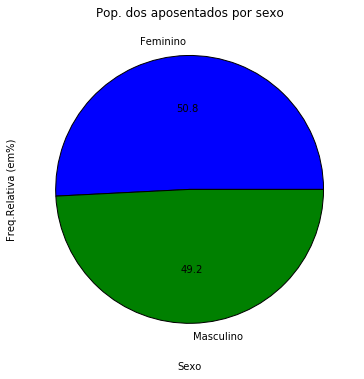

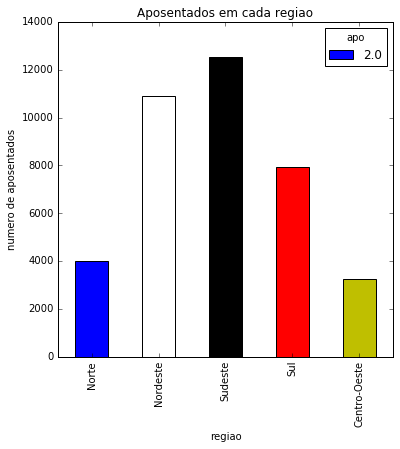

In [155]:
n = ap.shape[0]
ap.sexo.cat.categories = ('Masculino','Feminino')
ut0 = ((ap.sexo.value_counts()/n)*100).round(decimals=1)

plot = ut0.plot(kind='pie',title='Pop. dos aposentados por sexo',autopct='%.1f',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em%)')
plt.xlabel('Sexo')

ut73 = pd.crosstab(ap.regiao, d.apo)
plot = ut73.plot(kind='bar',title='Aposentados em cada regiao',figsize=(6, 6),color = ('b','w','k','r','y','c'))
plt.ylabel('numero de aposentados')

como principio é interessante analisar o quanto esses aposentados receber por mês

(0, 3000)

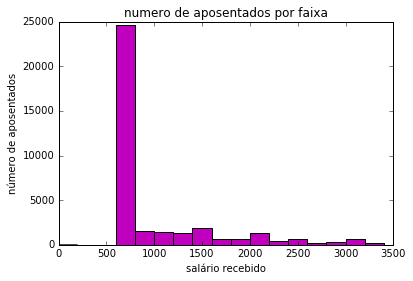

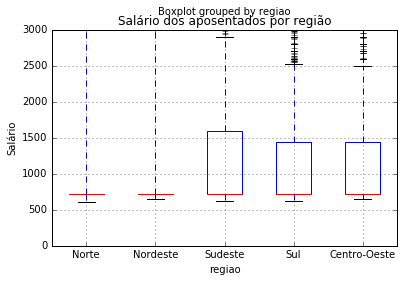

In [157]:
ap = ap[(ap.salario != 999999999999)]

faixa2= range(0,3600,200)
freq2=pd.cut(ap.salario,faixa2)
a2=freq2.value_counts()
plot =ap.salario.plot.hist(bins=faixa2,color=('m'))
plt.title('numero de aposentados por faixa')
plt.ylabel('número de aposentados')
plt.xlabel('salário recebido')


#ut7 = pd.crosstab(ap.salario, ap.regiao)
ap.boxplot(column = "salario", by = "regiao")
plt.title('Salário dos aposentados por região')
plt.ylabel('Salário')
plt.ylim(0,3000)

É claro agora a faixa pelas quais passam os "salários"(caso eles realmente recebam nesse caso), que eles frequentam, dessa forma é perceptível a faixa inicial obrigatória, que representa a contribuição mínima a previdência, e poucos casos fora da curva, mostrando que o salário para os aposentados não fogem muito a curva padrão.

Agora tenho como interesse analisar um parâmetro importantíssimo para o retorno ao mercado de trabalho que é a escolaridade.

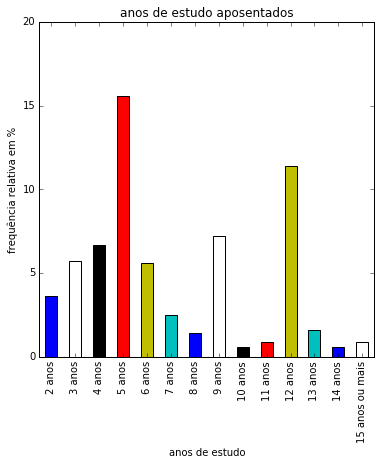

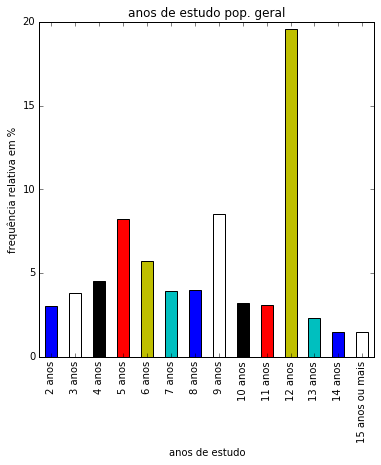

In [158]:
ap["estudoap"] = ap.V4803[(pnad2014.V4803 < 16)&(pnad2014.V4803>1)]
d["anosestudo"] = pnad2014.V4803[(pnad2014.V4803 < 16)&(pnad2014.V4803>1)]

d.anosestudo = d.anosestudo.astype('category')
ap.estudoap = ap.estudoap.astype('category')

d.anosestudo.cat.categories = ( '2 anos', '3 anos', '4 anos','5 anos',
                               '6 anos','7 anos','8 anos','9 anos','10 anos','11 anos','12 anos','13 anos','14 anos','15 anos ou mais')
ap.estudoap.cat.categories = ( '2 anos', '3 anos', '4 anos','5 anos','6 anos',
                                  '7 anos','8 anos','9 anos','10 anos','11 anos','12 anos','13 anos','14 anos','15 anos ou mais')
n1 = d.shape[0]
n = ap.shape[0]
ut1 = ((d.anosestudo.value_counts()/n1*100)).round(decimals=1)
ut2 = ((ap.estudoap.value_counts()/n*100)).round(decimals=1)

ut1l = ut1.reindex(['2 anos', '3 anos', '4 anos','5 anos',
                               '6 anos','7 anos','8 anos','9 anos','10 anos','11 anos','12 anos','13 anos','14 anos','15 anos ou mais'])
ut2l = ut2.reindex(['2 anos', '3 anos', '4 anos','5 anos',
                               '6 anos','7 anos','8 anos','9 anos','10 anos','11 anos','12 anos','13 anos','14 anos','15 anos ou mais'])

ut500 = pd.crosstab(ap.estudoap, d.anosestudo)


plot = ut2l.plot(kind='bar',title='anos de estudo aposentados',figsize=(6, 6),color = ('b','w','k','r','y','c'))
plt.xlabel("anos de estudo")
plt.ylabel("frequência relativa em %")
plt.ylim(0,20)
plt.show()

plot = ut1l.plot(kind='bar',title='anos de estudo pop. geral',figsize=(6, 6),color = ('b','w','k','r','y','c'))
plt.xlabel("anos de estudo")
plt.ylabel("frequência relativa em %")
plt.show()


Analisando os gráficos de anos de estudo, é visível a diferença de estudo entre a população aposentada e a total, dessa forma corroborando a ideia de dificuldade de retorno ao mercado de trabalho.

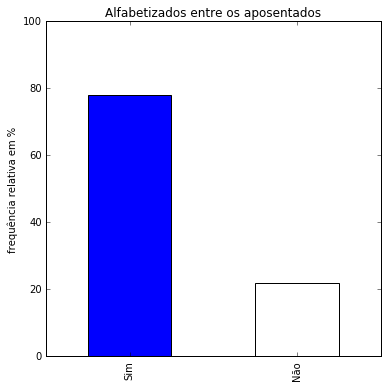

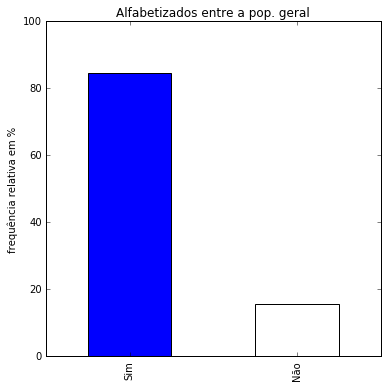

In [162]:
d.ana.cat.categories = ('Sim', 'Não')
ap.analfabeto.cat.categories = ('Sim', 'Não')
ut99 = ((ap.analfabeto.value_counts()/n)*100).round(decimals=1)
ut98 = ((d.ana.value_counts()/n1)*100).round(decimals=1)

plot = ut99.plot(kind='bar',title='Alfabetizados entre os aposentados',figsize=(6, 6),color = ('b','w','k','r','y','c'))
plt.ylabel("frequência relativa em %")
plt.ylim(0,100)
plt.show()

plot = ut98.plot(kind='bar',title='Alfabetizados entre a pop. geral',figsize=(6, 6),color = ('b','w','k','r','y','c'))
plt.ylim(0,100)
plt.ylabel("frequência relativa em %")
plt.show()

In [ ]:
Com estes gráfico é visível a dificuldade dos aposentados pela  maior quantidade de analfabetos

___
## Conclusão 

Descreva aqui suas conclusões!

Dessa forma é possível concluir que os aposentados possuem uma reintegração ao mercado de trabalho muito mais complicada do que qualquer outra faixa aqui estudada, com essa análise foi possível perceber defazagem sofrida por geração, esta que é relacionada a evolução do país em termos básicos como a educação, sendo assim os aposentados de maneira honrosa, estão batalhando para ressurgir no mercado de trabalho, enquanto cada vez mais notícias de calote na previdência são jogadas ao público. Acredito que uma situação seria facilmente combatida com uma gestão previdenciaria limpa e transparente, fazendo que aposentados, muita das vezes impossibilitados, arrisquem voltar a trabalhar.